In [1]:
import math
import numpy as np
import tensorflow as tf

from keras import *
from keras import backend as K
from matplotlib import pyplot as plt
from keras.engine import InputSpec
from keras.engine.topology import Layer
from keras.layers import Dense, Activation, BatchNormalization
from keras.layers import activations, initializers, regularizers, constraints, Lambda

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
# train_images, test_images = train_images - 0.5, test_images - 0.5
# train_images, test_images = train_images * 2, test_images * 2

# To one-hot
train_labels = utils.to_categorical(train_labels, 10)
test_labels = utils.to_categorical(test_labels, 10)

In [ ]:
def step_decay(epoch):
   initial_lrate = 0.001
   drop = 0.5
   epochs_drop = 10.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   return lrate

lrate = callbacks.LearningRateScheduler(step_decay)
callbacks_list = [lrate]

In [77]:
model = models.Sequential()

model.add(layers.Convolution2D(32, 3, padding='same',
                               input_shape=(32, 32, 3)))
model.add(layers.Activation('relu'))
model.add(layers.Convolution2D(32, 3))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Convolution2D(64, 3, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Convolution2D(64, 3))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.5))
model.add(AMSoftmax(10, 10, 0.35))
# model.add(layers.Dense(10))

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_softmax = model.fit(train_images, train_labels, epochs=15,
                            validation_data=(test_images, test_labels));

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 8s 159us/step - loss: 1.5210 - acc: 0.4447 - val_loss: 1.1600 - val_acc: 0.5842
Epoch 2/15
50000/50000 [==============================] - 8s 160us/step - loss: 1.1534 - acc: 0.5887 - val_loss: 0.9795 - val_acc: 0.6579
Epoch 3/15
50000/50000 [==============================] - 8s 160us/step - loss: 1.0054 - acc: 0.6452 - val_loss: 0.8857 - val_acc: 0.6899
Epoch 4/15
50000/50000 [==============================] - 8s 160us/step - loss: 0.9107 - acc: 0.6786 - val_loss: 0.8140 - val_acc: 0.7164
Epoch 5/15
50000/50000 [==============================] - 8s 160us/step - loss: 0.8462 - acc: 0.7024 - val_loss: 0.7869 - val_acc: 0.7234
Epoch 6/15
50000/50000 [==============================] - 8s 154us/step - loss: 0.7981 - acc: 0.7195 - val_loss: 0.7815 - val_acc: 0.7280
Epoch 7/15
50000/50000 [==============================] - 8s 165us/step - loss: 0.7655 - acc: 0.7305 - val_loss: 0.7525 - 

In [78]:
model.compile(optimizer='adam',
              loss=softmax_loss(t=1.1, s=32.),
              metrics=['accuracy'])

history_my_softmax_14 = model.fit(train_images, train_labels, epochs=30,
                               validation_data=(test_images, test_labels));

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
24640/50000 [=============>................] - ETA: 5s - loss: nan - acc: 0.1018

KeyboardInterrupt: 

In [65]:
model.compile(optimizer='adam',
              loss=softmax_loss(t=1.1, s=1., m=0.35),
              metrics=['accuracy'])

history_my_softmax_am = model.fit(train_images, train_labels, epochs=30,
                               validation_data=(test_images, test_labels));

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 9s 185us/step - loss: 1.6217 - acc: 0.4311 - val_loss: 0.7925 - val_acc: 0.5887
Epoch 2/30
50000/50000 [==============================] - 8s 168us/step - loss: 0.9673 - acc: 0.6047 - val_loss: 0.4860 - val_acc: 0.6696
Epoch 3/30
50000/50000 [==============================] - 8s 168us/step - loss: 0.7668 - acc: 0.6657 - val_loss: 0.3268 - val_acc: 0.7048
Epoch 4/30
50000/50000 [==============================] - 8s 169us/step - loss: 0.6459 - acc: 0.7007 - val_loss: 0.2456 - val_acc: 0.7202
Epoch 5/30
50000/50000 [==============================] - 9s 176us/step - loss: 0.5470 - acc: 0.7247 - val_loss: 0.1176 - val_acc: 0.7440
Epoch 6/30
50000/50000 [==============================] - 9s 176us/step - loss: 0.4778 - acc: 0.7410 - val_loss: 0.0606 - val_acc: 0.7524
Epoch 7/30
50000/50000 [==============================] - 9s 176us/step - loss: 0.4252 - acc: 0.7514 - val_loss: -0.0032 -

KeyboardInterrupt: 

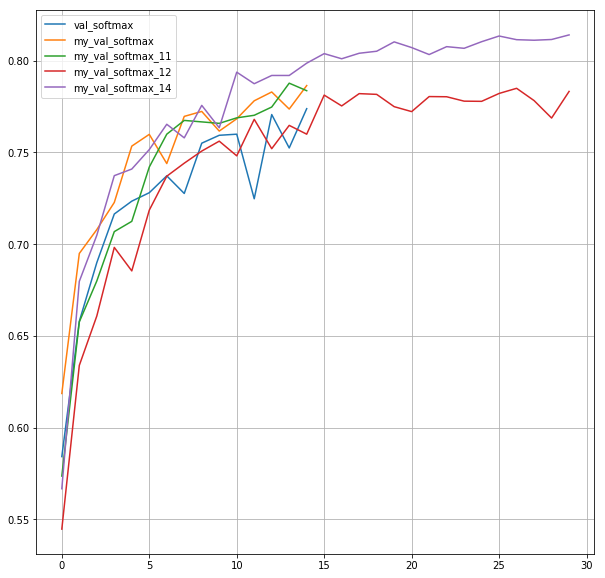

In [59]:
%matplotlib inline
plt.figure(figsize=(10, 10))
# plt.plot(history_softmax.history['acc'], label='softmax')
plt.plot(history_softmax.history['val_acc'], label='val_softmax')
# plt.plot(history_my_softmax.history['acc'], label='my_softmax')
plt.plot(history_my_softmax.history['val_acc'], label='my_val_softmax')
# plt.plot(history_my_softmax_11.history['acc'], label='my_softmax_11')
plt.plot(history_my_softmax_11.history['val_acc'], label='my_val_softmax_11')
# plt.plot(history_my_softmax_12.history['acc'], label='my_softmax_12')
plt.plot(history_my_softmax_12.history['val_acc'], label='my_val_softmax_12')
# plt.plot(history_my_softmax_14.history['acc'], label='my_softmax_14')
plt.plot(history_my_softmax_14.history['val_acc'], label='my_val_softmax_14')
plt.legend()
plt.grid();

In [53]:
np.argmax([max(history_my_softmax.history['val_acc']), 
           max(history_my_softmax_11.history['val_acc']),
           max(history_my_softmax_12.history['val_acc']),
           max(history_my_softmax_14.history['val_acc'])])

1

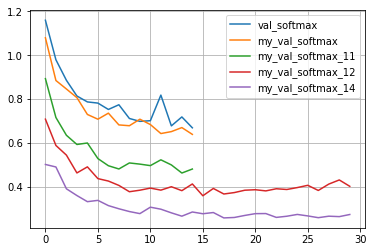

In [45]:
%matplotlib inline
# plt.plot(history_softmax.history['loss'], label='softmax')
plt.plot(history_softmax.history['val_loss'], label='val_softmax')
# plt.plot(history_my_softmax.history['loss'], label='my_softmax')
plt.plot(history_my_softmax.history['val_loss'], label='my_val_softmax')
# plt.plot(history_my_softmax_11.history['loss'], label='my_softmax_11')
plt.plot(history_my_softmax_11.history['val_loss'], label='my_val_softmax_11')
# plt.plot(history_my_softmax_12.history['loss'], label='my_softmax_12')
plt.plot(history_my_softmax_12.history['val_loss'], label='my_val_softmax_12')
# plt.plot(history_my_softmax_14.history['loss'], label='my_softmax_14')
plt.plot(history_my_softmax_14.history['val_loss'], label='my_val_softmax_14')
plt.legend()
plt.grid();

---

In [ ]:
from tensorflow.python.ops import array_ops


def softmax_loss(t=1.0, s=1, m=0.35):

    t = float(t)
    s = float(s)
    m = float(m)
    
    def softmax_loss_fixed(y_true, logits):
        """Softmax loss for multi-classification
        FL(p_t)=-alpha(1-p_t)^{gamma}ln(p_t)
        Notice: y_pred is raw logits
        Focal Loss for Dense Object Detection
        https://arxiv.org/abs/1708.02002

        Arguments:
            y_true {tensor} -- ground truth labels, shape of [batch_size, num_cls]
            y_pred {tensor} -- model's output, shape of [batch_size, num_cls]

        Keyword Arguments:

        Returns:
            [tensor] -- loss.
        """
        epsilon = 1.e-9
        zeros = array_ops.zeros_like(logits, dtype=logits.dtype)
        ones = array_ops.ones_like(logits, dtype=logits.dtype)
        
        logit_y = tf.reduce_sum(tf.multiply(y_true, logits), axis=-1, keepdims=True)
        I_k = array_ops.where(logit_y >= logits, zeros, ones)
        
        h = tf.exp(s*tf.multiply(t - 1., tf.multiply(logits + 1., I_k)))
        
        # softmax = tf.exp(logits) / tf.reduce_sum(tf.multiply(tf.exp(logits), h))
        softmax = tf.exp(logits) / (tf.reshape(
            tf.reduce_sum(tf.multiply(tf.exp(logits), h), axis=-1, keepdims=True), 
            [-1, 1]) + epsilon)
#         softmax = tf.exp(s*logits) / (tf.reduce_sum(tf.multiply(tf.exp(s*logits), h), 
#                                                     axis=-1, keepdims=True) + epsilon)
        # softmax = tf.nn.softmax(logits)
        # softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits))
        
        # We add epsilon because log(0) = nan
        softmax = tf.add(softmax, epsilon)
        ce = tf.multiply(y_true, -tf.log(softmax))
        ce = tf.reduce_sum(ce, axis=1)
        return tf.reduce_mean(ce)
    
    return softmax_loss_fixed

In [66]:
from tensorflow.python.ops import array_ops


def softmax_loss(t=1.0, s=1, m=0.35):

    t = float(t)
    s = float(s)
    m = float(m)
    
    def softmax_loss_fixed(y_true, logits):
        """Softmax loss for multi-classification
        FL(p_t)=-alpha(1-p_t)^{gamma}ln(p_t)
        Notice: y_pred is raw logits
        Focal Loss for Dense Object Detection
        https://arxiv.org/abs/1708.02002

        Arguments:
            y_true {tensor} -- ground truth labels, shape of [batch_size, num_cls]
            y_pred {tensor} -- model's output, shape of [batch_size, num_cls]

        Keyword Arguments:

        Returns:
            [tensor] -- loss.
        """
        epsilon = 1.e-9
        zeros = array_ops.zeros_like(logits, dtype=logits.dtype)
        ones = array_ops.ones_like(logits, dtype=logits.dtype)
        
        logit_y = tf.reduce_sum(tf.multiply(y_true, logits), axis=-1, keepdims=True)
        I_k = array_ops.where(logit_y >= logits, zeros, ones)
        I_k = array_ops.where(logit_y - m >= logits, zeros, ones)
        I_k_ = I_k * tf.cast(tf.not_equal(y_true, 1), tf.float32)
        h = tf.exp(s*tf.multiply(t - 1., tf.multiply(logits + 1., I_k)))

        # logits = logits - m * y_true
        softmax = tf.exp(s*(logits- m * y_true)) / tf.reduce_sum(tf.multiply(tf.exp(s*(logits- m * y_true)), h), 
                                                 axis=-1, keepdims=True)
        softmax = tf.exp(s*(logits- m * y_true)) / (tf.reshape(
            tf.reduce_sum(tf.multiply(tf.exp(s*(logits- m * y_true)), h), axis=-1, keepdims=True), 
            [-1, 1]) + epsilon)
#         softmax = tf.exp(s*logits) / (tf.reduce_sum(tf.multiply(tf.exp(s*logits), h), 
#                                                     axis=-1, keepdims=True) + epsilon)
        # softmax = tf.nn.softmax(logits)
        # softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits))
        
        # We add epsilon because log(0) = nan
        softmax = tf.add(softmax, epsilon)
        ce = tf.multiply(y_true, -tf.log(softmax))
        ce = tf.reduce_sum(ce, axis=1)
        return tf.reduce_mean(ce)
    
    return softmax_loss_fixed

In [56]:
class AMSoftmax(Layer):
    def __init__(self, units, s, m,
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=None,
                 kernel_constraint=None,
                 **kwargs
                 ):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(AMSoftmax, self).__init__(**kwargs)
        self.units = units
        self.s = s
        self.m = m
        self.kernel_initializer = initializers.get(kernel_initializer)
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.kernel_constraint = constraints.get(kernel_constraint)
        self.input_spec = InputSpec(min_ndim=2)
        self.supports_masking = True


    def build(self, input_shape):
        assert len(input_shape) >= 2
        input_dim = input_shape[-1]

        self.kernel = self.add_weight(shape=(input_dim, self.units),
                                      initializer=self.kernel_initializer,
                                      name='kernel',
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)
        self.bias = None

        self.input_spec = InputSpec(min_ndim=2, axes={-1: input_dim})
        self.built = True


    def call(self, inputs, **kwargs):
#         inputs = tf.nn.l2_normalize(inputs, dim=-1)
#         self.kernel = tf.nn.l2_normalize(self.kernel, dim=(0, 1))   # W归一化
        inputs = tf.nn.l2_normalize(inputs, dim=0)
        self.kernel = tf.nn.l2_normalize(self.kernel, dim=1)   # W归一化
        dis_cosin = K.dot(inputs, self.kernel)
        # psi = dis_cosin - self.m

        # e_costheta = K.exp(self.s * dis_cosin)
        # e_psi = K.exp(self.s * psi)
        # sum_x = K.sum(e_costheta, axis=-1, keepdims=True)

        # temp = e_psi - e_costheta
        # temp = temp + sum_x

        # output = e_psi / temp
        return dis_cosin


def amsoftmax_loss(y_true, y_pred):
    d1 = K.sum(y_true * y_pred, axis=-1)
    d1 = K.log(K.clip(d1, K.epsilon(), None))
    loss = -K.mean(d1, axis=-1)
    return loss

In [76]:
def sv_softmax_loss(t=1.0, s=1):

    t = float(t)
    s = float(s)
    
    def sv_softmax_loss_fixed(y_true, logits):
        """SV-Softmax loss
        Notice: y_pred is raw logits
        Support Vector Guided Softmax Loss for Face Recognition
        https://arxiv.org/pdf/1812.11317.pdf

        Arguments:
            y_true {tensor} -- ground truth labels, shape of [batch_size, num_cls]
            y_pred {tensor} -- model's output, shape of [batch_size, num_cls]

        Keyword Arguments:

        Returns:
            [tensor] -- loss.
        """
        epsilon = 1.e-9
        zeros = array_ops.zeros_like(logits, dtype=logits.dtype)
        ones = array_ops.ones_like(logits, dtype=logits.dtype)
        
        logit_y = tf.reduce_sum(tf.multiply(y_true, logits), axis=-1, keepdims=True)
        I_k = array_ops.where(logit_y >= logits, zeros, ones)
        
        h = tf.exp(s * tf.multiply(t - 1., tf.multiply(logits + 1., I_k)))
        
        softmax = tf.exp(s * logits) / (tf.reshape(
                         tf.reduce_sum(tf.multiply(tf.exp(s * logits), h), axis=-1, keepdims=True), 
                         [-1, 1]) + epsilon)
        
        # We add epsilon because log(0) = nan
        softmax = tf.add(softmax, epsilon)
        ce = tf.multiply(y_true, -tf.log(softmax))
        ce = tf.reduce_sum(ce, axis=1)
        return tf.reduce_mean(ce)
    
    return sv_softmax_loss_fixed